# Implementación de regresión logística usando librerias de Python para predicciones bancarias

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/bank/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [396]:
#Convertimos los si a 1 y los no a 0
data["y"] = (data["y"]=="yes").astype(int)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [397]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Hay muchos tipos de educación y consideramos que es algo bastante importante, pero no podemos hacer dummy con todos por ser tantos, así que los agruparemos.<br>
Por ejemplo, todos los basic pasarán a ser el mismo.<br>
También convierte en el video las demás categorías al mismo nombre pero "bien escrito"(con espacios y mayus) pero no lo hago, me parece una tontería.

In [398]:
data["education"] = np.where((data["education"] == "basic.9y") | (data["education"] == "basic.6y") | (data["education"] == "basic.4y"), "basic", data["education"])
data["education"].unique()

array(['basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

Ahora habría que hacer un análisis exploratorio de los datos

In [399]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [400]:
#Si queremos ver las variables numéricas pedimos la media y solo devuelve las numéricas
data.groupby("y").mean()
#Podemos ver que por ejemplo pdays o campaigns o duration son variables que influyen bastante

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [401]:
#Para comprobar si influye la educación podemos verlo así
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


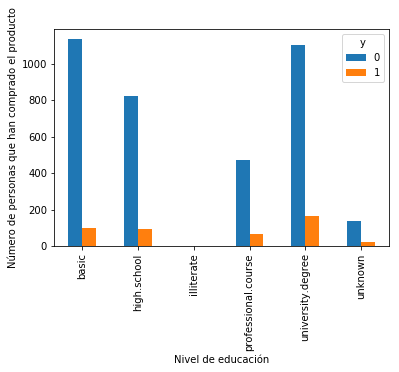

In [402]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.xlabel("Nivel de educación")
plt.ylabel("Número de personas que han comprado el producto")

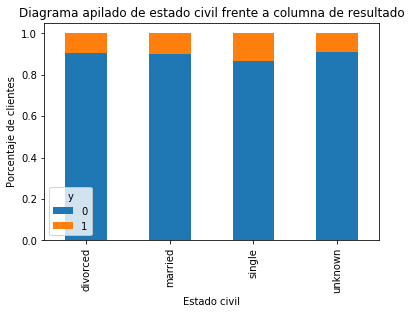

In [403]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil frente a columna de resultado")
plt.xlabel("Estado civil")
plt.ylabel("Porcentaje de clientes")

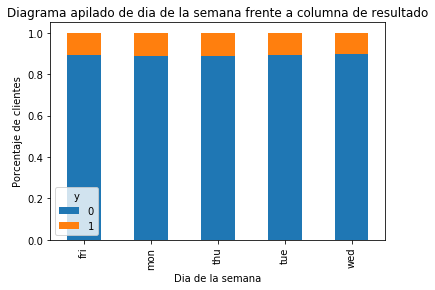

In [404]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de dia de la semana frente a columna de resultado")
plt.xlabel("Dia de la semana")
plt.ylabel("Porcentaje de clientes")

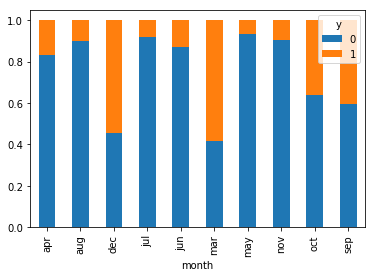

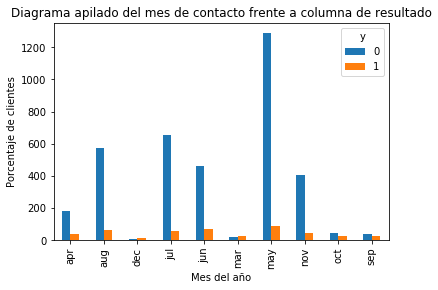

In [405]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
table.plot(kind="bar", stacked=False)
plt.title("Diagrama apilado del mes de contacto frente a columna de resultado")
plt.xlabel("Mes del año")
plt.ylabel("Porcentaje de clientes")
#Cuando más se ofrecieron estos productos (y también mas rechazaron fue en mayo)

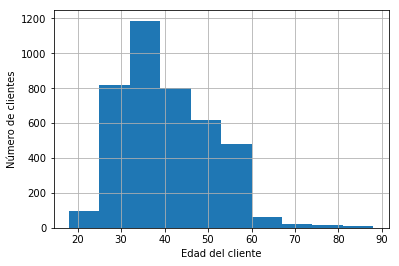

In [406]:
#Podemos ver el rango de edades en los que más se ofrece el producto
data.age.hist()
plt.xlabel("Edad del cliente")
plt.ylabel("Número de clientes")

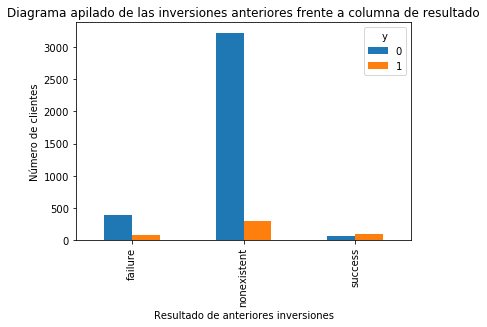

In [407]:
table = pd.crosstab(data.poutcome, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Diagrama apilado de las inversiones anteriores frente a columna de resultado")
plt.xlabel("Resultado de anteriores inversiones")
plt.ylabel("Número de clientes")

In [408]:
#Para quedarnos con las variables categóricas podemos hacer esto
categories = list(set(data.columns.values) - set(data.groupby("y").mean().columns.values) - set("y"))
categories

['housing',
 'default',
 'loan',
 'education',
 'job',
 'month',
 'marital',
 'poutcome',
 'day_of_week',
 'contact']

In [409]:
#Creamos las dummies para cada categoría
for category in categories:
    cat_dummy = pd.get_dummies(data[category], prefix="cat_"+category)
    data = data.join(cat_dummy)

#Borramos todas las que estaban en categories, solo interesan las que no estaban
#Ya que las que no estan son las numericas + las dummies creadas
data = data.drop(categories, axis=1)
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_contact_cellular,cat_contact_telephone
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,1,0,1,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,1,0,1,0,0,0,0,0,1
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,1,0,0,0,0,0,1,0,1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,1,0,1,0,0,0,0,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


In [410]:
y = data["y"]
X = data.drop("y", axis=1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_contact_cellular,cat_contact_telephone
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,1,0,1,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,1,0,1,0,0,0,0,0,1
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,1,0,0,0,0,0,1,0,1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,1,0,1,0,0,0,0,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


### Selección de variables a usar en el modelo

Usando RFE podemos ver que variables son importantes para nuestro modelo.<br>
Recordamos que podemos seleccionar una mascara de booleanos con la propiedad support\_ y un ranking con ranking_

In [411]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

n = 12

model = LogisticRegression()

rfe = RFE(model, 12)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False  True False False False  True False False False False
 False False False  True  True  True  True  True False  True False False
 False False False  True False  True False False False False False False
 False]
[37 43 18 44  1 14 30 29  1 42 20  9 10 39 36 49 15  6 24 31 13 48 22 34  8
 23  3  1 40  2 41  1  5 32 35 12 47 45 25  1  1  1  1  1 17  1 46 19 38 33
 50  1  7  1 26 21 28 27 11 16  4]


In [412]:
#Observamos que variables ha escogido y el ranking final etc...
list(zip(X.columns.values, rfe.support_, rfe.ranking_))

[('age', False, 37),
 ('duration', False, 43),
 ('campaign', False, 18),
 ('pdays', False, 44),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 29),
 ('euribor3m', True, 1),
 ('nr.employed', False, 42),
 ('cat_housing_no', False, 20),
 ('cat_housing_unknown', False, 9),
 ('cat_housing_yes', False, 10),
 ('cat_default_no', False, 39),
 ('cat_default_unknown', False, 36),
 ('cat_default_yes', False, 49),
 ('cat_loan_no', False, 15),
 ('cat_loan_unknown', False, 6),
 ('cat_loan_yes', False, 24),
 ('cat_education_basic', False, 31),
 ('cat_education_high.school', False, 13),
 ('cat_education_illiterate', False, 48),
 ('cat_education_professional.course', False, 22),
 ('cat_education_university.degree', False, 34),
 ('cat_education_unknown', False, 8),
 ('cat_job_admin.', False, 23),
 ('cat_job_blue-collar', False, 3),
 ('cat_job_entrepreneur', True, 1),
 ('cat_job_housemaid', False, 40),
 ('cat_job_management', False, 2),
 ('c

In [413]:
selected_features = X.columns.values[rfe.support_]
selected_features
#Recordar que aquí estamos poniendo que seleccione máximo 12, si dejamos que como máximo sean todas mete más...

array(['previous', 'euribor3m', 'cat_job_entrepreneur',
       'cat_job_self-employed', 'cat_month_dec', 'cat_month_jul',
       'cat_month_jun', 'cat_month_mar', 'cat_month_may', 'cat_month_oct',
       'cat_poutcome_failure', 'cat_poutcome_success'], dtype=object)

### Implementacion del modelo con statsmodels
Nos sirve para observar los valores estadísticos del modelo y comprobar si la selección de variables es correcta o podríamos prescindir de alguna otra.

In [414]:
import statsmodels.api as sm

model = sm.Logit(y, X[selected_features])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


In [415]:
#Como vemos es un poco mierda el valor de R2 del modelo...
#Dejando que meta todas las variables que quiera (sin poner 12 como límite) no mejora apenas el R2
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.192      
Dependent Variable:   y                 AIC:               2323.8813  
Date:                 2018-06-17 20:07  BIC:               2399.7617  
No. Observations:     4119              Log-Likelihood:    -1149.9    
Df Model:             11                LL-Null:           -1422.9    
Df Residuals:         4107              LLR p-value:       4.9751e-110
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
previous               0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
euribor3m             -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
cat_job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
cat_job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
cat_month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
cat_month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
cat_month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
cat_month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
cat_month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
cat_month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
cat_poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
cat_poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
======================================================================

"""

### Implementación del modelo final con sklearn

Con statsmodel haciamos una observación estadística y con sklearn vemos el accuracy del modelo

In [426]:
model = LogisticRegression()
model.fit(X[selected_features], y)
model.score(X[selected_features], y)

0.90216071862102454

In [427]:
#Porcentaje de gente que compra nuestro producto
y.mean()

0.10949259529011895

In [433]:
pd.DataFrame(list(zip(selected_features, np.transpose(model.coef_))))

,0,1
0,previous,[0.379831615186]
1,euribor3m,[-0.50274907084]
2,cat_job_entrepreneur,[-0.343066155425]
3,cat_job_self-employed,[-0.335064164787]
4,cat_month_dec,[0.873316799769]
5,cat_month_jul,[0.382087442986]
6,cat_month_jun,[0.509694987822]
7,cat_month_mar,[1.27036122827]
8,cat_month_may,[-0.743089627678]
9,cat_month_oct,[0.411855742873]
